<a href="https://colab.research.google.com/github/mehrnazeraeisi/Graph/blob/main/GraphDrY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

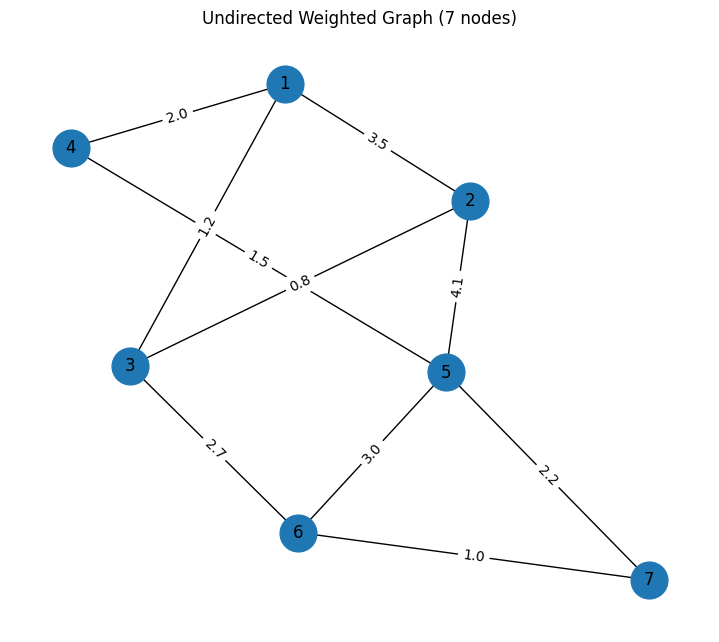

Eigenvalues of Laplacian L (column vector, decimals):
[[-0.    ]
 [ 2.4671]
 [ 3.3632]
 [ 5.354 ]
 [ 7.2223]
 [10.0706]
 [15.5228]]
   Eigenvalue
0     -0.0000
1      2.4671
2      3.3632
3      5.3540
4      7.2223
5     10.0706
6     15.5228

Enter a natural number n to compute L^n: 5

Eigenvalues of L^5 (column vector, decimals):
[[     0.    ]
 [    91.3952]
 [   430.273 ]
 [  4399.5018]
 [ 19650.1078]
 [103580.6393]
 [901274.0502]]
   Eigenvalue L^5
0          0.0000
1         91.3952
2        430.2730
3       4399.5018
4      19650.1078
5     103580.6393
6     901274.0502

Eigenvalues of L^5_i (after removing node 1):
[[    46.3614]
 [   427.8335]
 [  2605.5743]
 [ 15521.4557]
 [ 66218.1737]
 [853550.2165]]
   Eigenvalue L^5_1
0           46.3614
1          427.8335
2         2605.5743
3        15521.4557
4        66218.1737
5       853550.2165

Eigenvalues of L^5_i (after removing node 2):
[[    79.5219]
 [   419.8478]
 [  1445.3693]
 [ 18275.1441]
 [ 80380.9656]
 [639590.3958]]

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- تعریف گراف ---
G = nx.Graph()
G.add_nodes_from(range(1, 8))
edges_with_weights = [
    (1, 2, 3.5),
    (1, 3, 1.2),
    (1, 4, 2.0),
    (2, 3, 0.8),
    (2, 5, 4.1),
    (3, 6, 2.7),
    (4, 5, 1.5),
    (5, 6, 3.0),
    (5, 7, 2.2),
    (6, 7, 1.0)
]
G.add_weighted_edges_from(edges_with_weights)

# --- رسم گراف ---
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(7,6))
nx.draw(G, pos, with_labels=True, node_size=700, font_size=12)
edge_labels = {(u, v): f"{d['weight']:.1f}" for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Undirected Weighted Graph (7 nodes)")
plt.axis('off')
plt.show()

# --- محاسبه لاپلاسین و به توان رساندن ---
L = nx.laplacian_matrix(G).toarray()
np.set_printoptions(precision=4, suppress=True)
pd.options.display.float_format = '{:.4f}'.format

eig_L = np.linalg.eigh(L)[0].reshape(-1,1)
print("Eigenvalues of Laplacian L (column vector, decimals):")
print(eig_L)
print(pd.DataFrame(eig_L, columns=["Eigenvalue"]))

# --- گرفتن عدد طبیعی n از کاربر ---
n = int(input("\nEnter a natural number n to compute L^n: "))

Ln = np.linalg.matrix_power(L, n)
eig_Ln = np.linalg.eigh(Ln)[0].reshape(-1,1)
print(f"\nEigenvalues of L^{n} (column vector, decimals):")
print(eig_Ln)
print(pd.DataFrame(eig_Ln, columns=[f"Eigenvalue L^{n}"]))

# --- حذف سطر و ستون i ام از Ln و محاسبه مقادیر ویژه ---
for i in range(7):  # i=0..6 متناظر با راس 1..7
    Ln_i = np.delete(Ln, i, axis=0)
    Ln_i = np.delete(Ln_i, i, axis=1)

    eig_Ln_i = np.linalg.eigh(Ln_i)[0].reshape(-1,1)

    print(f"\nEigenvalues of L^{n}_i (after removing node {i+1}):")
    print(eig_Ln_i)

    df_Ln_i = pd.DataFrame(eig_Ln_i, columns=[f"Eigenvalue L^{n}_{i+1}"])
    print(df_Ln_i)
